### A. Preprocessing Data 

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
data=pd.read_csv("online_retail.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 08:26,3.39,17850.0,United Kingdom


In [4]:
a=np.sum(data.isnull())
a=pd.DataFrame(a,columns=['a'])
b=pd.DataFrame([])
a=a.values
b['Variabel']=list(data)
b['Jumlah Missing']=a
b

,Variabel,Jumlah Missing
0,InvoiceNo,0
1,StockCode,0
2,Description,1454
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,135080
7,Country,0


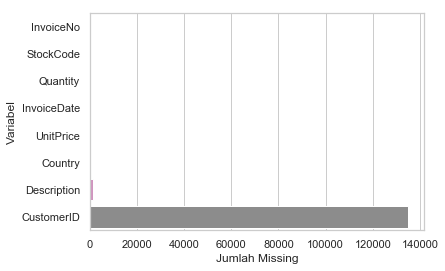

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
bb=b.sort_values('Jumlah Missing')
ax = sns.barplot(x="Jumlah Missing", y="Variabel", data=bb)
plt.show()

### B. Association Rule 

In [7]:
len(data[data['Description'].isnull()])

1454

In [8]:
for i, d in data[data['Description'].isnull()].iterrows():
    data['Description'][i] = "Code-" + str(d['StockCode'])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
len(data[data['Description']==data['StockCode'].map(lambda x: "Code-"+str(x))])

1454

In [9]:
invoicenonew = data.groupby('InvoiceNo')
transactions = []
for name,group in invoicenonew:
    transactions.append(list(group['Description'].map(str)))

In [10]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.0045, min_confidence = 0.5, min_lift = 3, min_length = 2)
results = list(rules)

In [15]:
final = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(results), 6)), columns=['GeneralRules', 'LeftRules', 'RightRules', 'Support', 'Confidence', 'Lift'])
index = 0
for g, s, i in results:
    final.iloc[index] = [' _&&_ '.join(list(g)), ' _&&_ '.join(list(i[0][0])), ' _&&_ '.join(list(i[0][1])), s, i[0][2], i[0][3]]
    index = index+1
# The most significant rules
final = final.sort_values('Lift', ascending=0)
final.head(10)

,GeneralRules,LeftRules,RightRules,Support,Confidence,Lift
4002,HERB MARKER THYME _&&_ HERB MARKER BASIL _&&_ ...,HERB MARKER BASIL _&&_ HERB MARKER CHIVES _&&...,HERB MARKER THYME,0.006409,0.988095,107.528011
4060,HERB MARKER THYME _&&_ HERB MARKER BASIL _&&_ ...,HERB MARKER BASIL _&&_ HERB MARKER CHIVES _&&...,HERB MARKER THYME,0.006100,0.987500,107.463235
3538,HERB MARKER THYME _&&_ HERB MARKER BASIL _&&_ ...,HERB MARKER BASIL _&&_ HERB MARKER CHIVES _&&...,HERB MARKER THYME,0.006525,0.982558,106.925445
4001,HERB MARKER THYME _&&_ HERB MARKER BASIL _&&_ ...,HERB MARKER BASIL _&&_ HERB MARKER CHIVES _&&...,HERB MARKER THYME,0.006139,0.981481,106.808279
3546,HERB MARKER THYME _&&_ HERB MARKER PARSLEY _&&...,HERB MARKER PARSLEY _&&_ HERB MARKER CHIVES _...,HERB MARKER THYME,0.006911,0.972826,105.866368
3533,HERB MARKER BASIL _&&_ HERB MARKER CHIVES _&&...,HERB MARKER BASIL _&&_ HERB MARKER CHIVES _&&...,HERB MARKER PARSLEY,0.006448,0.976608,105.833272
4004,HERB MARKER THYME _&&_ HERB MARKER CHIVES _&&...,HERB MARKER PARSLEY _&&_ HERB MARKER CHIVES _...,HERB MARKER THYME,0.006564,0.971429,105.714286
4003,HERB MARKER THYME _&&_ HERB MARKER BASIL _&&_ ...,HERB MARKER BASIL _&&_ HERB MARKER PARSLEY _&&...,HERB MARKER THYME,0.006680,0.966480,105.175813
3545,HERB MARKER THYME _&&_ HERB MARKER ROSEMARY _&...,HERB MARKER ROSEMARY _&&_ HERB MARKER CHIVES ...,HERB MARKER THYME,0.006641,0.966292,105.155321
3537,HERB MARKER THYME _&&_ HERB MARKER BASIL _&&_ ...,HERB MARKER BASIL _&&_ HERB MARKER CHIVES _&&...,HERB MARKER THYME,0.006564,0.965909,105.113636


In [16]:
count=1
for i, d in final.head(20).iterrows():
    print('Rule #'+str(count)+':')
    print(d['LeftRules'])
    print('=> '+d['RightRules'])
    print('Support: '+str(d['Support'])+' - Confidence: '+str(d['Confidence'])+' - Lift: '+str(d['Lift']))
    print('______________________________________')
    count=count+1

Rule #1:
HERB MARKER BASIL _&&_ HERB MARKER CHIVES  _&&_ HERB MARKER PARSLEY _&&_ HERB MARKER ROSEMARY
=> HERB MARKER THYME
Support: 0.006409266409266409 - Confidence: 0.9880952380952381 - Lift: 107.5280112044818
______________________________________
Rule #2:
HERB MARKER BASIL _&&_ HERB MARKER CHIVES  _&&_ HERB MARKER MINT _&&_ HERB MARKER ROSEMARY _&&_ HERB MARKER PARSLEY
=> HERB MARKER THYME
Support: 0.006100386100386101 - Confidence: 0.9875 - Lift: 107.46323529411765
______________________________________
Rule #3:
HERB MARKER BASIL _&&_ HERB MARKER CHIVES  _&&_ HERB MARKER ROSEMARY
=> HERB MARKER THYME
Support: 0.0065250965250965255 - Confidence: 0.9825581395348838 - Lift: 106.92544459644324
______________________________________
Rule #4:
HERB MARKER BASIL _&&_ HERB MARKER CHIVES  _&&_ HERB MARKER ROSEMARY _&&_ HERB MARKER MINT
=> HERB MARKER THYME
Support: 0.006138996138996139 - Confidence: 0.9814814814814815 - Lift: 106.8082788671024
______________________________________
Rule #5